In [446]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.utils import resample

In [448]:
data = pd.read_csv("https://hbiostat.org/data/repo/rhc.csv")
data.head()

,Unnamed: 0,cat1,cat2,ca,sadmdte,dschdte,dthdte,lstctdte,death,cardiohx,...,meta,hema,seps,trauma,ortho,adld3p,urin1,race,income,ptid
0,1,COPD,NaN,Yes,11142,11151.0,NaN,11382,No,0,...,No,No,No,No,No,0.0,NaN,white,Under $11k,5
1,2,MOSF w/Sepsis,NaN,No,11799,11844.0,11844.0,11844,Yes,1,...,No,No,Yes,No,No,NaN,1437.0,white,Under $11k,7
2,3,MOSF w/Malignancy,MOSF w/Sepsis,Yes,12083,12143.0,NaN,12400,No,0,...,No,No,No,No,No,NaN,599.0,white,$25-$50k,9
3,4,ARF,NaN,No,11146,11183.0,11183.0,11182,Yes,0,...,No,No,No,No,No,NaN,NaN,white,$11-$25k,10
4,5,MOSF w/Sepsis,NaN,No,12035,12037.0,12037.0,12036,Yes,0,...,No,No,No,No,No,NaN,64.0,white,Under $11k,11


In [449]:
# chercher des info  sur la dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5735 entries, 0 to 5734
Data columns (total 63 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5735 non-null   int64  
 1   cat1        5735 non-null   object 
 2   cat2        1200 non-null   object 
 3   ca          5735 non-null   object 
 4   sadmdte     5735 non-null   int64  
 5   dschdte     5734 non-null   float64
 6   dthdte      3722 non-null   float64
 7   lstctdte    5735 non-null   int64  
 8   death       5735 non-null   object 
 9   cardiohx    5735 non-null   int64  
 10  chfhx       5735 non-null   int64  
 11  dementhx    5735 non-null   int64  
 12  psychhx     5735 non-null   int64  
 13  chrpulhx    5735 non-null   int64  
 14  renalhx     5735 non-null   int64  
 15  liverhx     5735 non-null   int64  
 16  gibledhx    5735 non-null   int64  
 17  malighx     5735 non-null   int64  
 18  immunhx     5735 non-null   int64  
 19  transhx     5735 non-null  

In [450]:
# choix de 15 variable quantitative no binaires 
var_quant = [] 
for var in data.columns : 
    if data[var].dtype in ['int64' ,'float64' ] : 
        if data[var].nunique() > 2 :
            var_quant.append(var)
            if len(var_quant) == 15: 
                break

var_quant

['Unnamed: 0',
 'sadmdte',
 'dschdte',
 'dthdte',
 'lstctdte',
 'age',
 'edu',
 'surv2md1',
 'das2d3pc',
 't3d30',
 'aps1',
 'scoma1',
 'meanbp1',
 'wblc1',
 'hrt1']

In [451]:
# choix de 5 variable qualitative  binaires
var_qual = []
for var in data.columns :
    if data[var].dtype in ['object'] : 
        if data[var].nunique() == 2 : 
            var_qual.append(var)
            if len(var_qual) == 6 : 
                break 
var_qual
# j'ai ajouter un autre variable car j'ai mis la variable swang1 dans la liste 

['death', 'sex', 'dth30', 'swang1', 'dnr1', 'resp']

In [452]:
#2 filtration de la data
data_filtered = data[var_qual + var_quant]

In [453]:
data_filtered

,death,sex,dth30,swang1,dnr1,resp,Unnamed: 0,sadmdte,dschdte,dthdte,...,age,edu,surv2md1,das2d3pc,t3d30,aps1,scoma1,meanbp1,wblc1,hrt1
0,No,Male,No,No RHC,No,Yes,1,11142,11151.0,NaN,...,70.25098,12.000000,0.640991,23.50000,30,46,0,41.0,22.097656,124
1,Yes,Female,No,RHC,No,No,2,11799,11844.0,11844.0,...,78.17896,12.000000,0.755000,14.75195,30,50,0,63.0,28.898438,137
2,No,Female,No,RHC,No,No,3,12083,12143.0,NaN,...,46.09198,14.069916,0.317000,18.13672,30,82,0,57.0,0.049995,130
3,Yes,Female,No,No RHC,No,Yes,4,11146,11183.0,11183.0,...,75.33197,9.000000,0.440979,22.92969,30,48,0,55.0,23.296875,58
4,Yes,Male,Yes,RHC,Yes,No,5,12035,12037.0,12037.0,...,67.90997,9.945259,0.437000,21.05078,2,72,41,65.0,29.699219,125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5730,No,Male,No,No RHC,No,No,5731,11867,11900.0,NaN,...,75.56195,6.000000,0.544000,14.75195,30,45,9,60.0,22.796875,110
5731,Yes,Female,No,No RHC,No,Yes,5732,12199,12241.0,12629.0,...,44.65698,12.000000,0.637000,23.00000,30,62,0,62.0,5.199219,130
5732,Yes,Male,No,No RHC,No,Yes,5733,12087,12093.0,12396.0,...,80.48499,17.000000,0.740000,17.50000,30,43,0,168.0,27.898438,150
5733,Yes,Male,Yes,No RHC,No,No,5734,11286,11309.0,11309.0,...,67.37897,12.000000,0.671997,16.05859,23,51,9,50.0,9.000000,110


In [454]:
# deveser la data en deux groupe pour calculer le smd 
groupe1 = data_filtered[data_filtered['swang1'] == 'RHC']
groupe2 = data_filtered[data_filtered['swang1'] == 'No RHC']
groupe2

,death,sex,dth30,swang1,dnr1,resp,Unnamed: 0,sadmdte,dschdte,dthdte,...,age,edu,surv2md1,das2d3pc,t3d30,aps1,scoma1,meanbp1,wblc1,hrt1
0,No,Male,No,No RHC,No,Yes,1,11142,11151.0,NaN,...,70.25098,12.0,0.640991,23.50000,30,46,0,41.0,22.097656,124
3,Yes,Female,No,No RHC,No,Yes,4,11146,11183.0,11183.0,...,75.33197,9.0,0.440979,22.92969,30,48,0,55.0,23.296875,58
5,No,Female,No,No RHC,No,Yes,6,12389,12396.0,NaN,...,86.07794,8.0,0.665000,17.50000,30,38,0,115.0,18.000000,134
6,No,Male,No,No RHC,No,No,7,12381,12423.0,NaN,...,54.96799,14.0,0.339000,15.40625,30,29,26,67.0,7.699219,135
7,Yes,Male,No,No RHC,No,Yes,8,11453,11487.0,11491.0,...,43.63898,12.0,0.631958,29.14453,30,25,100,128.0,38.093750,102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5730,No,Male,No,No RHC,No,No,5731,11867,11900.0,NaN,...,75.56195,6.0,0.544000,14.75195,30,45,9,60.0,22.796875,110
5731,Yes,Female,No,No RHC,No,Yes,5732,12199,12241.0,12629.0,...,44.65698,12.0,0.637000,23.00000,30,62,0,62.0,5.199219,130
5732,Yes,Male,No,No RHC,No,Yes,5733,12087,12093.0,12396.0,...,80.48499,17.0,0.740000,17.50000,30,43,0,168.0,27.898438,150
5733,Yes,Male,Yes,No RHC,No,No,5734,11286,11309.0,11309.0,...,67.37897,12.0,0.671997,16.05859,23,51,9,50.0,9.000000,110


In [455]:
quant_stat = [] 
for var in var_quant : 
    mean1 = groupe1[var].mean()
    mean2 = groupe2[var].mean()
    std1  = groupe1[var].std()
    std2  = groupe2[var].std()
    smd = (mean1 - mean2) / (np.sqrt((std1**2 + std2**2) / 2))
    quant_stat.append([var , mean1 , mean2 , std1 , std2 , smd])

quant_results = pd.DataFrame(quant_stat, columns=["Variable" ,  "Mean (RHC)" ,"Mean (No RHC)", "STD (RHC)",  "STD (No RHC)", "SMD"])

In [456]:
quant_results

,Variable,Mean (RHC),Mean (No RHC),STD (RHC),STD (No RHC),SMD
0,Unnamed: 0,2903.454670,2846.194030,1671.463312,1645.780748,0.034522
1,sadmdte,11628.536172,11644.929034,513.199739,514.412286,-0.031905
2,dschdte,11652.880440,11664.458181,512.850694,513.836285,-0.022554
3,dthdte,11724.498654,11773.388193,536.136305,539.819610,-0.090876
4,lstctdte,11762.437729,11792.833005,524.554094,523.549006,-0.058001
5,age,60.749836,61.760926,15.630698,17.287674,-0.061352
6,edu,11.856428,11.569005,3.157222,3.134234,0.091369
7,surv2md1,0.568458,0.607206,0.198316,0.192054,-0.198498
8,das2d3pc,20.700794,20.371478,5.032762,5.481727,0.062583
9,t3d30,22.672161,24.190369,10.443208,9.760705,-0.150203


In [457]:
# les variables qualitatives 

binary_mapping = {"Yes": 1, "No": 0, "Male": 1, "Female": 0, "RHC": 1, "No RHC": 0}

# Convertir les variables binaires en 0/1
for var in var_qual:
    data_filtered[var] = data_filtered[var].map(binary_mapping)

# Convertir la variable Swang1 (groupe)
data_filtered[var_qual]
group_1 = data_filtered[data_filtered['swang1'] == 1]  # RHC
group_2 = data_filtered[data_filtered['swang1'] == 0]  # No RHC
data_filtered[var_qual]


C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_8260\2672621413.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[var] = data_filtered[var].map(binary_mapping)
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_8260\2672621413.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[var] = data_filtered[var].map(binary_mapping)
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_8260\2672621413.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

,death,sex,dth30,swang1,dnr1,resp
0,0,1,0,0,0,1
1,1,0,0,1,0,0
2,0,0,0,1,0,0
3,1,0,0,0,0,1
4,1,1,1,1,1,0
...,...,...,...,...,...,...
5730,0,1,0,0,0,0
5731,1,0,0,0,0,1
5732,1,1,0,0,0,1
5733,1,1,1,0,0,0


In [458]:
# faire le mappng pour changer les valeurs 
group_1[var_qual]

,death,sex,dth30,swang1,dnr1,resp
1,1,0,0,1,0,0
2,0,0,0,1,0,0
4,1,1,1,1,1,0
9,0,0,0,1,0,0
11,0,1,0,1,0,0
...,...,...,...,...,...,...
5719,1,1,0,1,0,0
5721,1,1,0,1,0,0
5722,1,0,1,1,0,1
5725,0,0,0,1,0,0


In [459]:
binary_stat = [] 
for var in var_qual :
    n1 = group_1[var].count()
    n2 = group_2[var].count()
    p1 = group_1[var].mean()
    p2 = group_2[var].mean()
    smd = 100 * (p1 -p2) / (np.sqrt((p1*(1-p1) + p2*(1  - p2)) /2))
    binary_stat.append({
        "Variable": var,
        "n (RHC)": n1,
        "% (RHC)": p1 * 100,
        "n (No RHC)": n2,
        "% (No RHC)": p2 * 100,
        "SMD": smd
    })
binary_result = pd.DataFrame(binary_stat)
binary_result

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_8260\3648910787.py:7: RuntimeWarning: divide by zero encountered in scalar divide
  smd = 100 * (p1 -p2) / (np.sqrt((p1*(1-p1) + p2*(1  - p2)) /2))


,Variable,n (RHC),% (RHC),n (No RHC),% (No RHC),SMD
0,death,2184,68.040293,3551,62.968178,10.685392
1,sex,2184,58.516484,3551,53.900310,9.314437
2,dth30,2184,38.003663,3551,30.639257,15.557979
3,swang1,2184,100.000000,3551,0.000000,inf
4,dnr1,2184,7.097070,3551,14.052380,-22.763910
5,resp,2184,28.937729,3551,41.706562,-26.956229


In [460]:
binary_result = binary_result.drop(index= 3)

In [466]:
binary_result

,Variable,n (RHC),% (RHC),n (No RHC),% (No RHC),SMD
0,death,2184,68.040293,3551,62.968178,10.685392
1,sex,2184,58.516484,3551,53.900310,9.314437
2,dth30,2184,38.003663,3551,30.639257,15.557979
4,dnr1,2184,7.097070,3551,14.052380,-22.763910
5,resp,2184,28.937729,3551,41.706562,-26.956229


In [468]:
# question 3 la représentation 
#1 construire la base de données de smd
data1 = quant_results[['Variable', 'SMD']]
data2 = binary_result[['Variable','SMD']]
SMD = pd.concat([data1, data2], ignore_index=True)

In [472]:
#TRANSFORMER LES VALEUR DE SMD en positive , Valeur absolut 
SMD.SMD = SMD.SMD.abs()
SMD

,Variable,SMD
0,Unnamed: 0,0.034522
1,sadmdte,0.031905
2,dschdte,0.022554
3,dthdte,0.090876
4,lstctdte,0.058001
5,age,0.061352
6,edu,0.091369
7,surv2md1,0.198498
8,das2d3pc,0.062583
9,t3d30,0.150203


In [476]:
# un trie  
SMD  = SMD.sort_values(by='SMD' ,ascending= False)
SMD

,Variable,SMD
19,resp,26.956229
18,dnr1,22.763910
17,dth30,15.557979
15,death,10.685392
16,sex,9.314437
10,aps1,0.501402
12,meanbp1,0.455096
7,surv2md1,0.198498
9,t3d30,0.150203
14,hrt1,0.146945


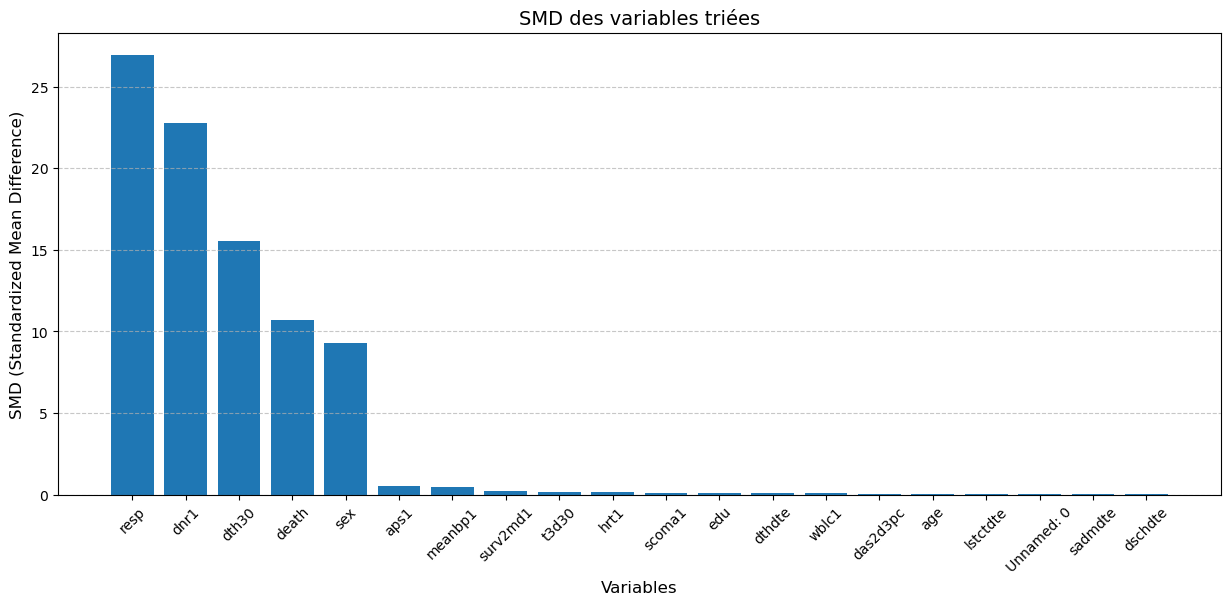

In [478]:
# représenation graphique
plt.figure(figsize=(15, 6))
plt.bar(SMD['Variable'],SMD['SMD'])
plt.xlabel('Variables', fontsize=12)
plt.ylabel('SMD (Standardized Mean Difference)', fontsize=12)
plt.title('SMD des variables triées', fontsize=14)
plt.xticks(rotation=45, fontsize=10)  # Rotation et ajustement de la taille des ticks
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [479]:
data_filtered
data_filtered.swang1.value_counts()

swang1
0    3551
1    2184
Name: count, dtype: int64

In [483]:
# randomiser le variable swnang1 1 = 
data_filtered.loc[:, 'swang1'] = resample([0, 1], n_samples=5735, replace=True, random_state=123)

In [484]:
data_filtered

,death,sex,dth30,swang1,dnr1,resp,Unnamed: 0,sadmdte,dschdte,dthdte,...,age,edu,surv2md1,das2d3pc,t3d30,aps1,scoma1,meanbp1,wblc1,hrt1
0,0,1,0,0,0,1,1,11142,11151.0,NaN,...,70.25098,12.000000,0.640991,23.50000,30,46,0,41.0,22.097656,124
1,1,0,0,1,0,0,2,11799,11844.0,11844.0,...,78.17896,12.000000,0.755000,14.75195,30,50,0,63.0,28.898438,137
2,0,0,0,0,0,0,3,12083,12143.0,NaN,...,46.09198,14.069916,0.317000,18.13672,30,82,0,57.0,0.049995,130
3,1,0,0,0,0,1,4,11146,11183.0,11183.0,...,75.33197,9.000000,0.440979,22.92969,30,48,0,55.0,23.296875,58
4,1,1,1,0,1,0,5,12035,12037.0,12037.0,...,67.90997,9.945259,0.437000,21.05078,2,72,41,65.0,29.699219,125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5730,0,1,0,0,0,0,5731,11867,11900.0,NaN,...,75.56195,6.000000,0.544000,14.75195,30,45,9,60.0,22.796875,110
5731,1,0,0,0,0,1,5732,12199,12241.0,12629.0,...,44.65698,12.000000,0.637000,23.00000,30,62,0,62.0,5.199219,130
5732,1,1,0,0,0,1,5733,12087,12093.0,12396.0,...,80.48499,17.000000,0.740000,17.50000,30,43,0,168.0,27.898438,150
5733,1,1,1,0,0,0,5734,11286,11309.0,11309.0,...,67.37897,12.000000,0.671997,16.05859,23,51,9,50.0,9.000000,110


In [486]:
data_filtered.swang1.value_counts()

swang1
0    2899
1    2836
Name: count, dtype: int64

In [487]:
# recalculer les SMD 
groupe1 = data_filtered[data_filtered['swang1'] == 1]
groupe2 = data_filtered[data_filtered['swang1'] == 0]

quant_stat = [] 
for var in var_quant : 
    mean1 = groupe1[var].mean()
    mean2 = groupe2[var].mean()
    std1  = groupe1[var].std()
    std2  = groupe2[var].std()
    smd = (mean1 - mean2) / (np.sqrt((std1**2 + std2**2) / 2))
    quant_stat.append([var , mean1 , mean2 , std1 , std2 , smd])

quant_results = pd.DataFrame(quant_stat, columns=["Variable" ,  "Mean (RHC)" ,"Mean (No RHC)", "STD (RHC)",  "STD (No RHC)", "SMD"])
quant_results

,Variable,Mean (RHC),Mean (No RHC),STD (RHC),STD (No RHC),SMD
0,Unnamed: 0,2822.534556,2912.477406,1663.441827,1647.156431,-0.054336
1,sadmdte,11637.044076,11640.292860,515.084600,512.956597,-0.006320
2,dschdte,11658.899859,11661.176329,514.784425,512.221789,-0.004433
3,dthdte,11752.771662,11754.936407,535.677211,541.983507,-0.004017
4,lstctdte,11781.380818,11781.137634,523.355846,524.905698,0.000464
5,age,61.248620,61.500381,16.851495,16.516323,-0.015089
6,edu,11.697870,11.659475,3.055241,3.232411,0.012208
7,surv2md1,0.593407,0.591514,0.195334,0.195403,0.009693
8,das2d3pc,20.457195,20.535717,5.361117,5.274491,-0.014765
9,t3d30,23.694640,23.531563,9.977745,10.125709,0.016223


In [488]:
binary_stat = [] 
for var in var_qual :
    n1 = groupe1[var].count()
    n2 = groupe2[var].count()
    p1 = groupe1[var].mean()
    p2 = groupe2[var].mean()
    smd = 100 * (p1 -p2) / (np.sqrt((p1*(1-p1) + p2*(1  - p2)) /2))
    binary_stat.append({
        "Variable": var,
        "n (RHC)": n1,
        "% (RHC)": p1 * 100,
        "n (No RHC)": n2,
        "% (No RHC)": p2 * 100,
        "SMD": smd
    })
binary_result = pd.DataFrame(binary_stat)
binary_result

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_8260\1639850694.py:7: RuntimeWarning: divide by zero encountered in scalar divide
  smd = 100 * (p1 -p2) / (np.sqrt((p1*(1-p1) + p2*(1  - p2)) /2))


,Variable,n (RHC),% (RHC),n (No RHC),% (No RHC),SMD
0,death,2836,64.703808,2899,65.091411,-0.812096
1,sex,2836,56.170663,2899,55.156951,2.040665
2,dth30,2836,33.074753,2899,33.804760,-1.547395
3,swang1,2836,100.000000,2899,0.000000,inf
4,dnr1,2836,11.988717,2899,10.831321,3.640979
5,resp,2836,36.953456,2899,36.736806,0.449124


In [489]:
# combiner les deux bases de données 
data11 = quant_results[['Variable', 'SMD']]
data22 = binary_result[['Variable','SMD']]
SMD2 = pd.concat([data11, data22], ignore_index=True)

In [493]:
SMD2.SMD = SMD2.SMD.abs()
SMD2  = SMD2.sort_values(by='SMD',ascending=False)


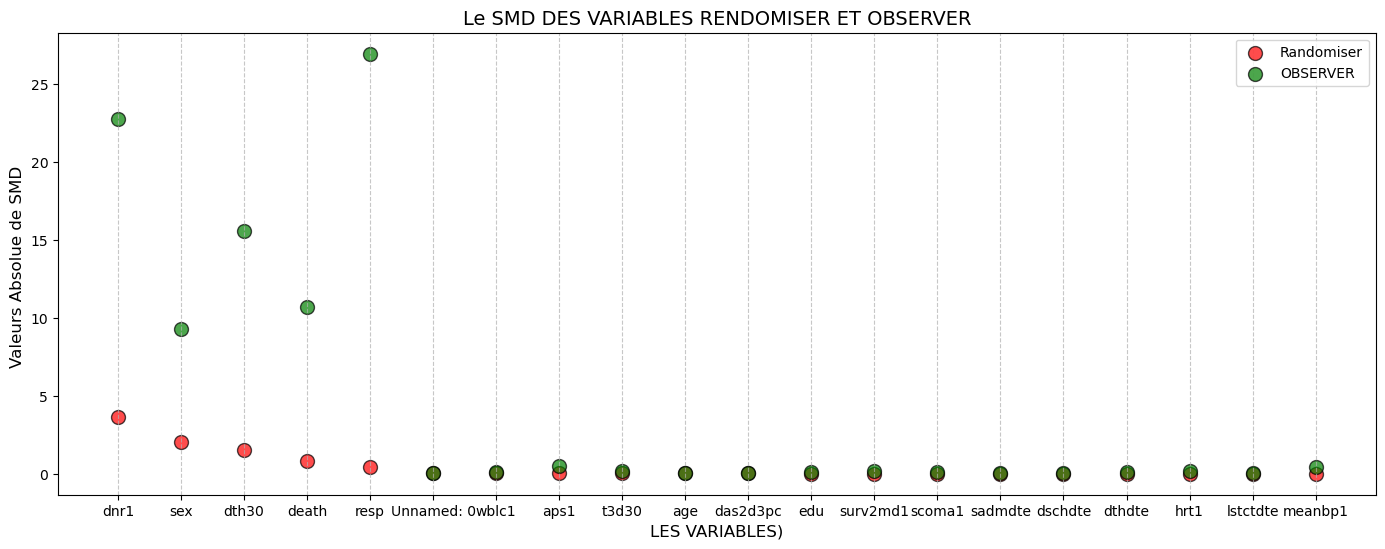

In [537]:
plt.figure(figsize=(17, 6))
plt.scatter(SMD2.Variable, SMD2.SMD, color="red", s=100, edgecolor="k",label = 'Randomiser', alpha=0.7)
plt.scatter(SMD.Variable, SMD.SMD, color="green", label="OBSERVER", s=100, edgecolor="k", alpha=0.7)
plt.xlabel("LES VARIABLES)", fontsize=12)
plt.ylabel("Valeurs Absolue de SMD ", fontsize=12)
plt.title("Le SMD DES VARIABLES RENDOMISER ET OBSERVER", fontsize=14)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.legend()
plt.show()

Q6. Conclusion sur les SMD dans les études observationnelles
Les SMD (Standardized Mean Differences) sont utiles pour évaluer l'équilibre des covariables dans les études observationnelles. Voici quelques points importants :

Détection des déséquilibres :

Un SMD > 0.1 indique généralement un déséquilibre important entre les groupes.
Les SMD permettent de comparer les groupes même si les unités des variables diffèrent (grâce à la standardisation).
Vérification de la randomisation :

Après randomisation, les SMD devraient être proches de 0, indiquant que les groupes sont bien équilibrés.
Utilité pour ajustements :

Si des déséquilibres persistent, des ajustements statistiques (comme la pondération par score de propension) peuvent être nécessaires.
Limite :

Les SMD ne capturent pas toutes les interactions ou confusions possibles entre covariables.

On remarque que les variables qualitatives binaires présentent des valeurs de SMD élevées, ce qui indique un déséquilibre important entre leurs distributions. En revanche, les valeurs de SMD des variables quantitatives sont proches de 0, ce qui montre que leurs distributions sont bien équilibrées.
